In [122]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [123]:
data = pd.read_csv('/Users/user/Downloads/stroke.csv')

In [124]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,NaN,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,NaN,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [125]:
data = data.drop('id', 1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,NaN,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,NaN,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [126]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('gender', ('object', 0)),
 ('age', ('float64', 16)),
 ('hypertension', ('int64', 0)),
 ('heart_disease', ('int64', 0)),
 ('ever_married', ('object', 0)),
 ('work_type', ('object', 0)),
 ('Residence_type', ('object', 0)),
 ('avg_glucose_level', ('float64', 0)),
 ('bmi', ('float64', 201)),
 ('smoking_status', ('object', 0)),
 ('stroke', ('int64', 0))]

# Устранение пропусков

In [127]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in data.columns]

[('gender', 0.0),
 ('age', 0.0031311154598825833),
 ('hypertension', 0.0),
 ('heart_disease', 0.0),
 ('ever_married', 0.0),
 ('work_type', 0.0),
 ('Residence_type', 0.0),
 ('avg_glucose_level', 0.0),
 ('bmi', 0.03933463796477495),
 ('smoking_status', 0.0),
 ('stroke', 0.0)]

In [128]:
# Заполним пропуски
data.dropna(subset=['age'], inplace=True)

In [129]:
data['gender'] = data['gender'].astype(str).str[0]

In [130]:
# Заполним пропуски возраста средними значениями
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
impute_na(data, 'bmi', data['bmi'].mean())

In [131]:
# Убедимся что нет пустых значений
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [132]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,F,61.0,0,0,Yes,Self-employed,Rural,202.21,28.886269,never smoked,1
2,M,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,F,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
5,M,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,M,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1


# Кодирование категориальных признаков

In [133]:
from sklearn.preprocessing import LabelEncoder

In [134]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['work_type'])

In [135]:
data['work_type'].unique()

array(['Self-employed', 'Private', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [136]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4])

In [137]:
le.inverse_transform([0, 1, 2, 3,4])

array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype=object)

In [138]:
data['smoking_status'].unique()

array(['never smoked', 'smokes', 'formerly smoked', 'Unknown'],
      dtype=object)

In [139]:
#TargetEncoder
from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder

In [140]:
ce_TargetEncoder1 = ce_TargetEncoder()
data_MEAN_ENC = ce_TargetEncoder1.fit_transform(data[data.columns.difference(['stroke'])], data['stroke'])

In [141]:
data_MEAN_ENC.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,smoking_status,work_type
1,0.044258,61.0,202.21,28.886269,0.063136,0.045896,0,0,0.046178,0.076074
2,0.044258,80.0,105.92,32.500000,0.063136,0.048387,1,0,0.046178,0.048747
3,0.049497,49.0,171.23,34.400000,0.063136,0.045896,0,0,0.052030,0.048747
5,0.049497,81.0,186.21,29.000000,0.063136,0.048387,0,0,0.075000,0.048747
6,0.044258,74.0,70.09,27.400000,0.063136,0.048387,1,1,0.046178,0.048747


In [142]:
def check_mean_encoding(field):
    for s in data[field].unique():
        data_filter = data[data[field]==s]
        if data_filter.shape[0] > 0:
            prob = sum(data_filter['stroke']) / data_filter.shape[0]
            print(s, '-' , prob)

In [143]:
check_mean_encoding('gender')

F - 0.04589614740368509
M - 0.04838709677419355
O - 0.0


In [144]:
check_mean_encoding('smoking_status')

never smoked - 0.04617834394904458
smokes - 0.05203045685279188
formerly smoked - 0.075
Unknown - 0.029182879377431907


In [145]:
check_mean_encoding('work_type')

Self-employed - 0.07607361963190185
Private - 0.04874699622382424
Govt_job - 0.0502283105022831
children - 0.002911208151382824
Never_worked - 0.0


In [146]:
#Weight of evidence (WoE) encoding
from category_encoders.woe import WOEEncoder as ce_WOEEncoder

In [147]:
ce_WOEEncoder1 = ce_WOEEncoder()
data_WOE_ENC = ce_WOEEncoder1.fit_transform(data[data.columns.difference(['stroke'])], data['stroke'])

In [148]:
data_WOE_ENC.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,smoking_status,work_type
1,-0.060512,61.0,202.21,28.886269,0.310539,-0.024090,0,0,-0.013714,0.521122
2,-0.060512,80.0,105.92,32.500000,0.310539,0.033712,1,0,-0.013714,0.038900
3,0.055682,49.0,171.23,34.400000,0.310539,-0.024090,0,0,0.123646,0.038900
5,0.055682,81.0,186.21,29.000000,0.310539,0.033712,0,0,0.504884,0.038900
6,-0.060512,74.0,70.09,27.400000,0.310539,0.033712,1,1,-0.013714,0.038900


In [149]:
def check_woe_encoding(field):
    data_ones = data[data['stroke'] == 1].shape[0]
    data_zeros = data[data['stroke'] == 0].shape[0]
    
    for s in data[field].unique():
        data_filter = data[data[field]==s]
        if data_filter.shape[0] > 0:
            
            filter_data_ones = data_filter[data_filter['stroke'] == 1].shape[0]
            filter_data_zeros = data_filter[data_filter['stroke'] == 0].shape[0]

            good = filter_data_ones / data_ones
            bad = filter_data_zeros / data_zeros
            
            woe = np.log(good/bad)
            print(s, '-' , woe)

In [150]:
check_woe_encoding('gender')

F - -0.023090517909826913
M - 0.032375673556304815
O - -inf


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [151]:
check_woe_encoding('smoking_status')

never smoked - -0.01666493933506075
smokes - 0.10880771036540528
formerly smoked - 0.49899520481779985
Unknown - -0.4932550658553942


In [152]:
check_woe_encoding('work_type')

Self-employed - 0.5143699860391127
Private - 0.040164341532197056
Govt_job - 0.07165802189096712
children - -2.8249708289083655
Never_worked - -inf


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


# Нормализация числовых признаков

In [153]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

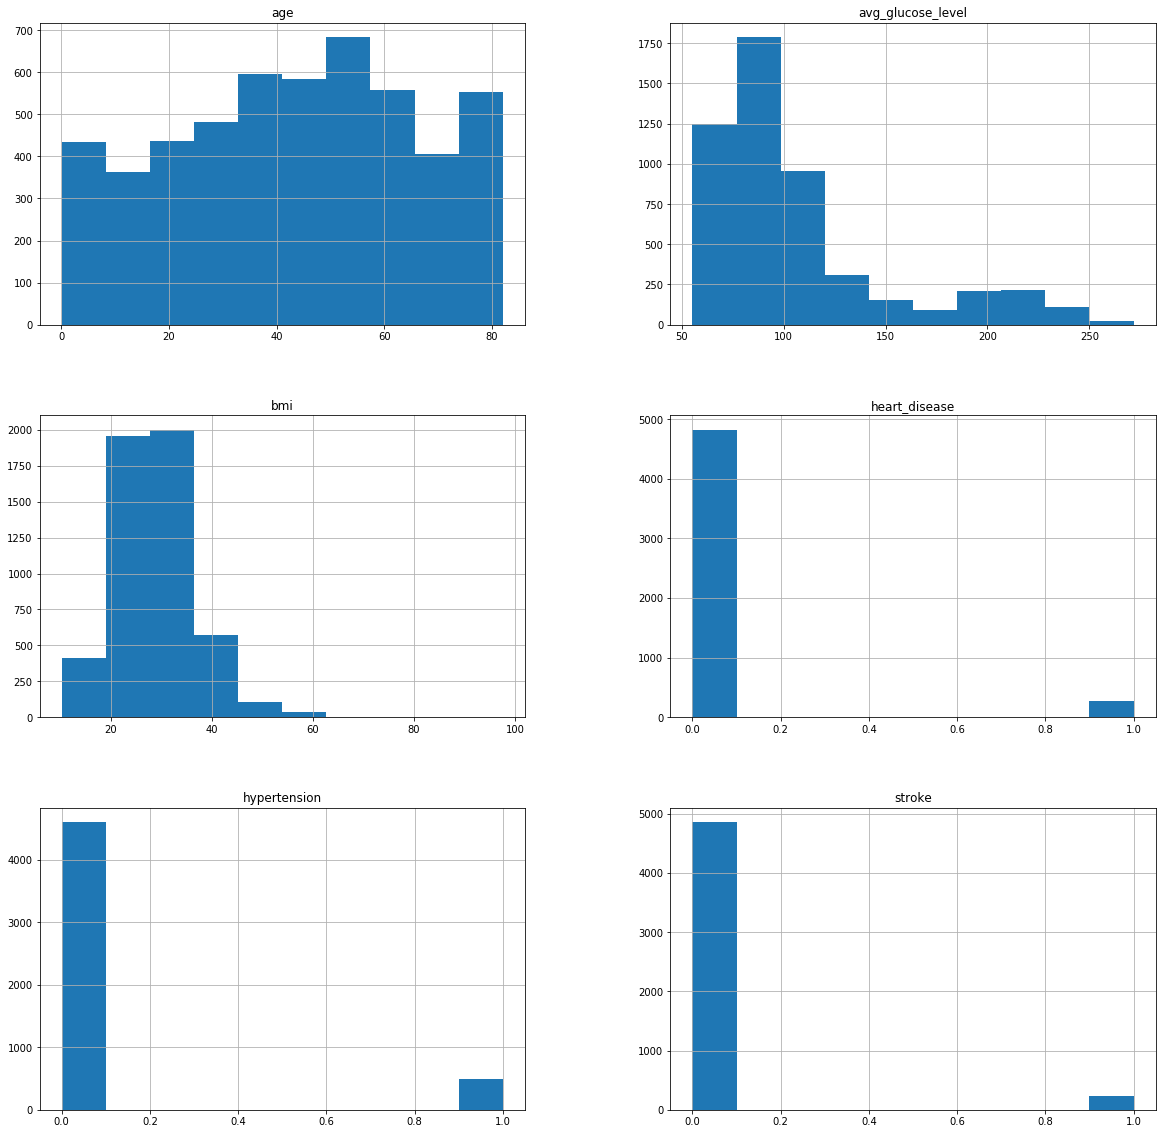

In [154]:
data.hist(figsize=(20,20))
plt.show()

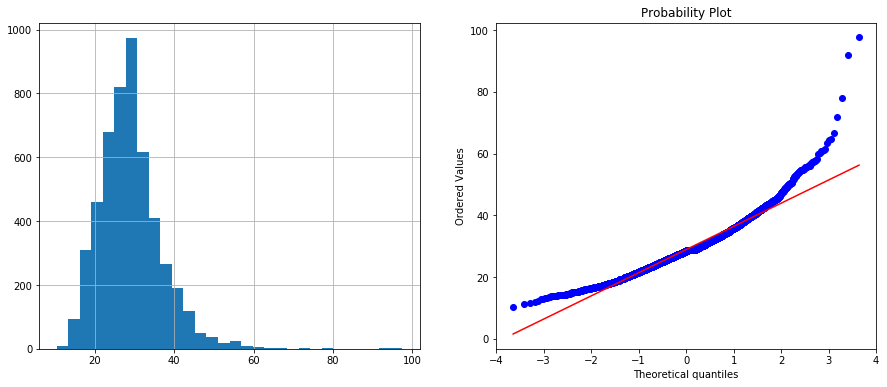

In [170]:
diagnostic_plots(data, 'bmi')

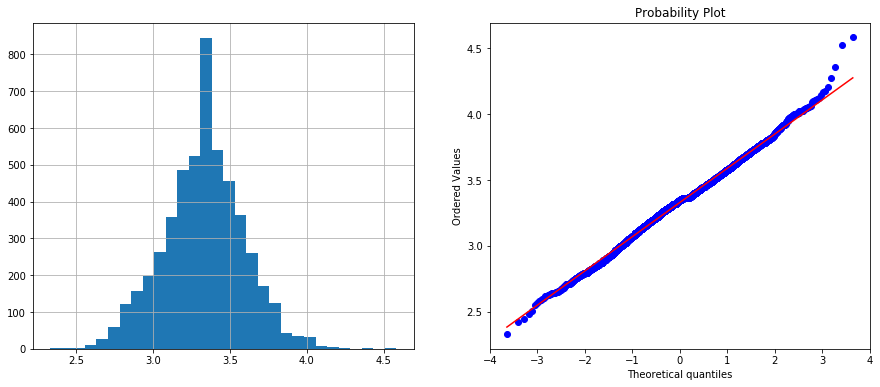

In [171]:
#Логарифмическое преобразование
data['bmi'] = np.log(data['bmi'])
diagnostic_plots(data, 'bmi')

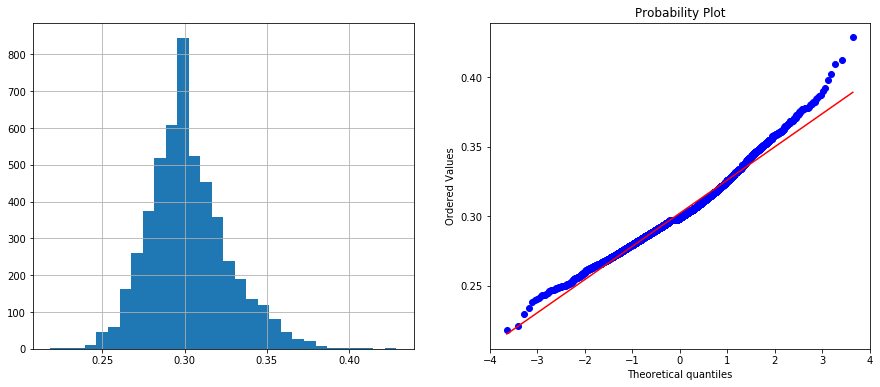

In [172]:
#Обратное преобразование
data['bmi_reciprocal'] = 1 / (data['bmi']) 
diagnostic_plots(data, 'bmi_reciprocal')

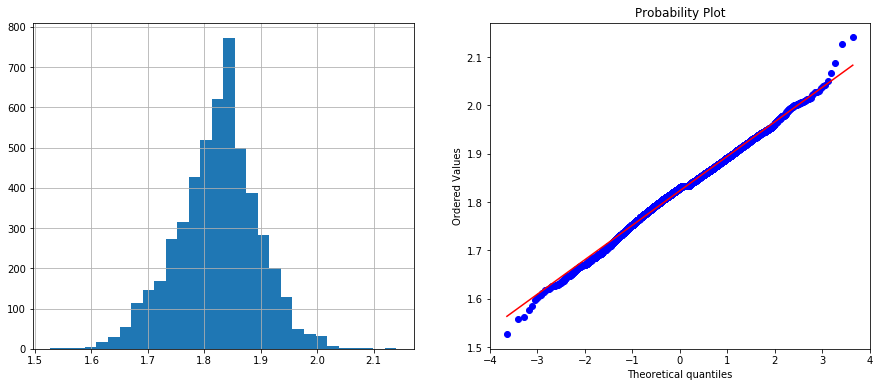

In [173]:
#Квадратный корень
data['bmi_sqr'] = data['bmi']**(1/2) 
diagnostic_plots(data, 'bmi_sqr')

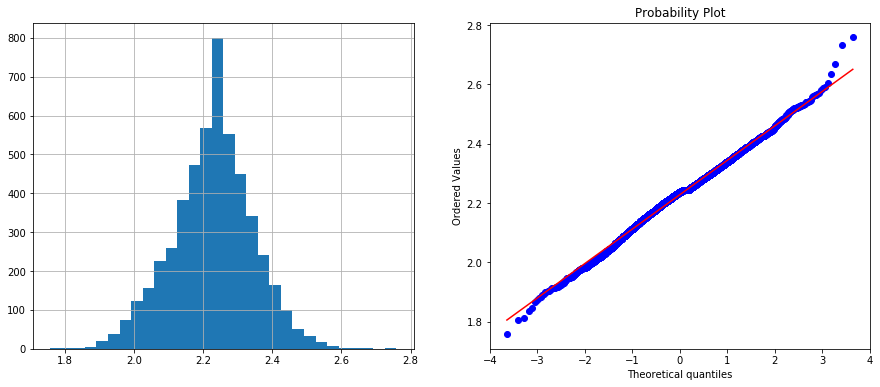

In [174]:
#Возведение в степень
data['bmi_exp1'] = data['bmi']**(1/1.5)
diagnostic_plots(data, 'bmi_exp1')

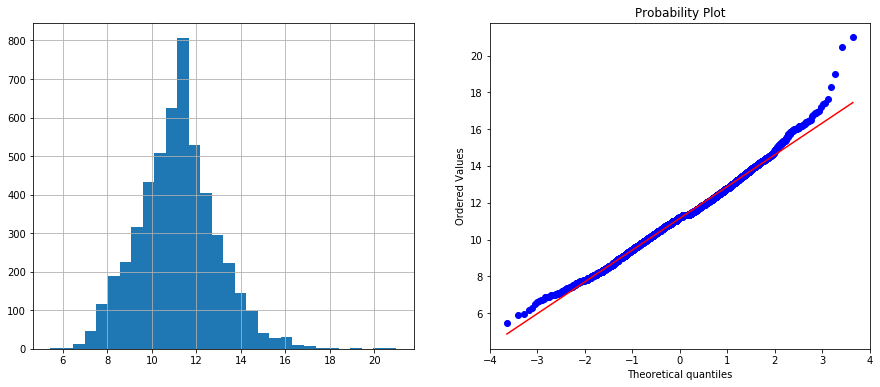

In [175]:
data['bmi_exp2'] = data['bmi']**(2)
diagnostic_plots(data, 'bmi_exp2')

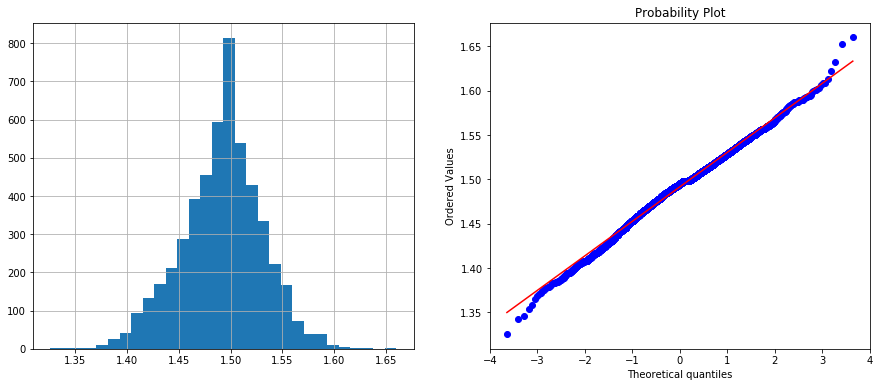

In [176]:
data['bmi_exp3'] = data['bmi']**(0.333)
diagnostic_plots(data, 'bmi_exp3')

Оптимальное значение λ = 0.01648681986277836


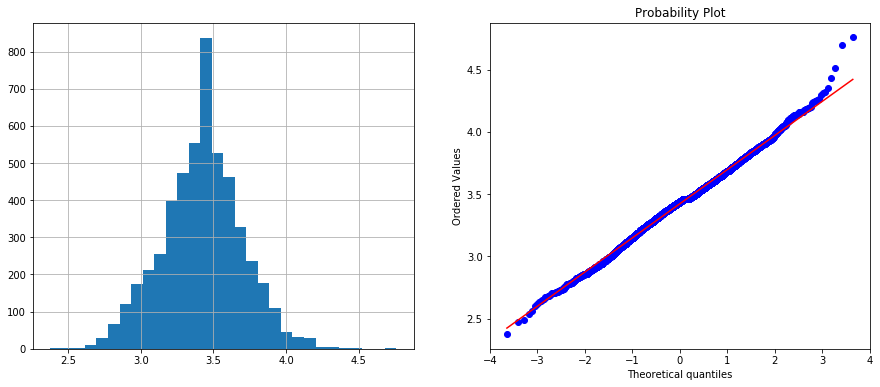

In [169]:
#Преобразованиея Бокса-Кокса
data['bmi_boxcox'], param = stats.boxcox(data['bmi']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'bmi_boxcox')